In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("movies_dataset.csv")

In [3]:
df.head()

,Sr No.,Movie Name,genre,Budget,Revenue,Profit,Release Year
0,1,Jurassic World,Action,150000000,1513528810,1363528810,2015
1,2,Mad Max: Fury Road,Action,150000000,378436354,228436354,2015
2,3,Insurgent,Thriller,110000000,295238201,185238201,2015
3,4,Star Wars: The Force Awakens,Action,200000000,2068178225,1868178225,2015
4,5,Furious 7,Action,190000000,1506249360,1316249360,2015


In [4]:
df.tail()

,Sr No.,Movie Name,genre,Budget,Revenue,Profit,Release Year
1241,1242,Live and Let Die,Action,7000000,161777836,154777836,1973
1242,1243,Thunderball,Action,11000000,141195658,130195658,1965
1243,1244,On Her Majesty's Secret Service,Action,7000000,81974493,74974493,1969
1244,1245,Halloween,Thriller,300000,70000000,69700000,1978
1245,1246,Animal House,Comedy,2700000,141000000,138300000,1978


In [7]:
x=df.info()
print(x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        1246 non-null   int64 
 1   Movie Name    1246 non-null   object
 2   genre         1246 non-null   object
 3   Budget        1246 non-null   int64 
 4   Revenue       1246 non-null   int64 
 5   Profit        1246 non-null   int64 
 6   Release Year  1246 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 68.3+ KB
None


In [8]:
print(df.describe())

            Sr No.        Budget       Revenue        Profit  Release Year
count  1246.000000  1.246000e+03  1.246000e+03  1.246000e+03   1246.000000
mean    623.500000  5.322737e+07  1.796533e+08  1.264260e+08   2006.989567
std     359.833526  5.554236e+07  2.569285e+08  2.212353e+08      8.104581
min       1.000000  1.000000e+00  4.300000e+01 -4.139124e+08   1961.000000
25%     312.250000  1.500000e+07  2.689599e+07  3.087282e+06   2005.000000
50%     623.500000  3.500000e+07  8.332984e+07  4.583454e+07   2009.000000
75%     934.750000  7.187500e+07  2.179464e+08  1.499652e+08   2011.000000
max    1246.000000  4.250000e+08  2.781506e+09  2.544506e+09   2015.000000


In [10]:
df.isnull().sum()

Sr No.          0
Movie Name      0
genre           0
Budget          0
Revenue         0
Profit          0
Release Year    0
dtype: int64

# Analysis Of Dataset

### 1. Profit Of Top 10 genres Bar Graph

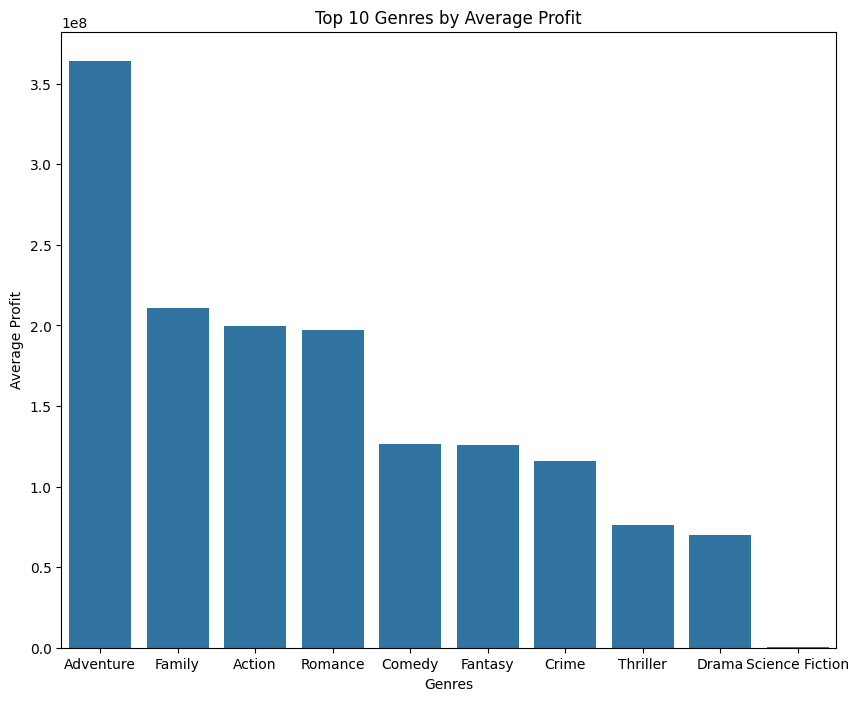

In [18]:
plt.figure(figsize=(10, 8))
avg_profit_genre = df.groupby("genre")["Profit"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_profit_genre.index, y=avg_profit_genre.values,)
plt.title("Top 10 Genres by Average Profit")
plt.ylabel("Average Profit")
plt.xlabel("Genres")
plt.show()

#### Explanation: This plot ranks genres based on their average profit across all movies.

### 2. Profit by Budget Scatter Plot 

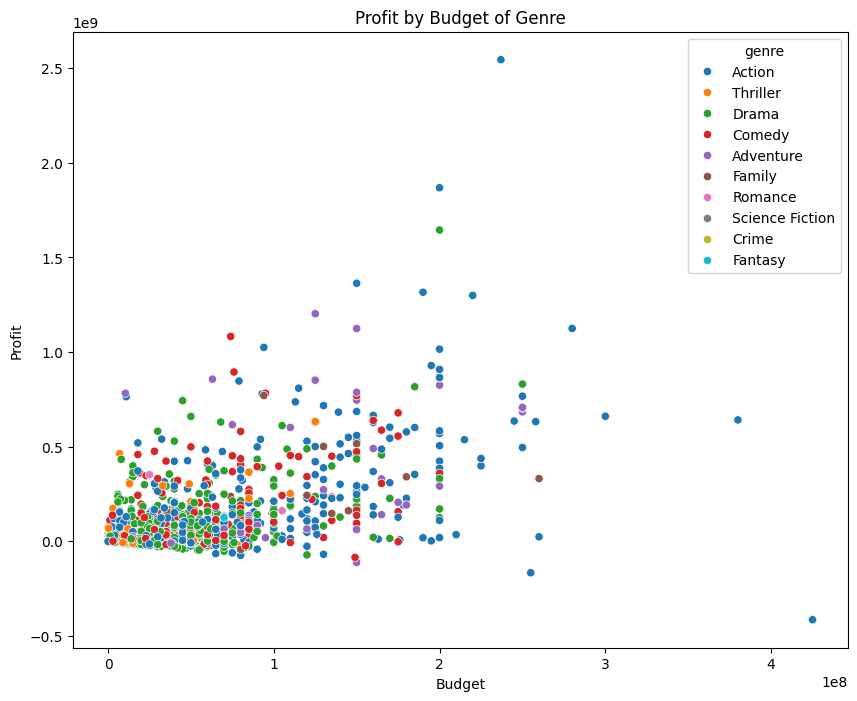

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Budget", y="Profit", data=df, hue="genre")
plt.title("Profit by Budget of Genre")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.show()

#### Explanation: This scatter plot compares each movie’s budget and profit, color-coded by genre.

### 3. Revenue by Profit Line Plot

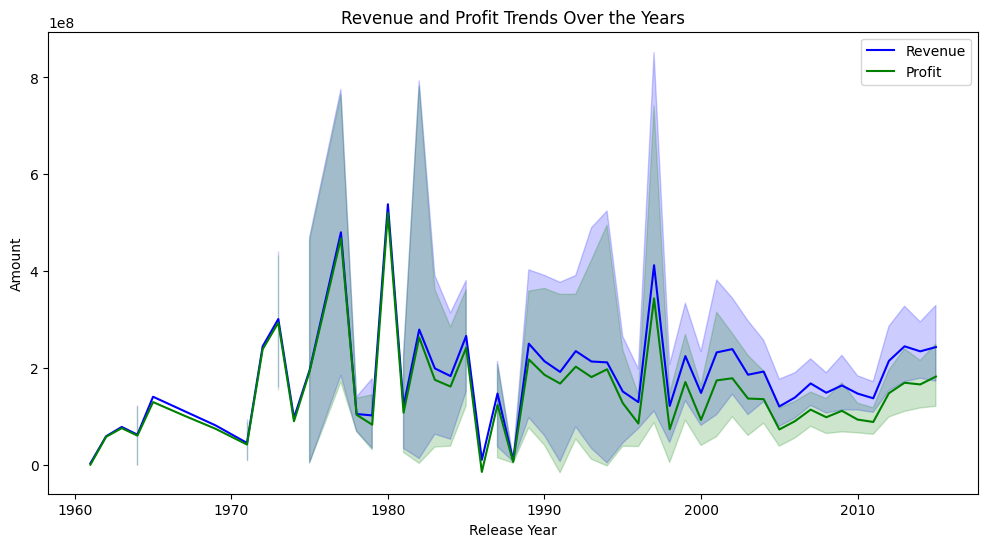

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Release Year", y="Revenue", data=df, label="Revenue", color="blue")
sns.lineplot(x="Release Year", y="Profit", data=df, label="Profit", color="green")
plt.title("Revenue and Profit Trends Over the Years")
plt.ylabel("Amount")
plt.show()

#### Explanation: This line graph tracks average movie revenue and profit over time.

### 4. Correlation Map Between Budget Revenue and Profit

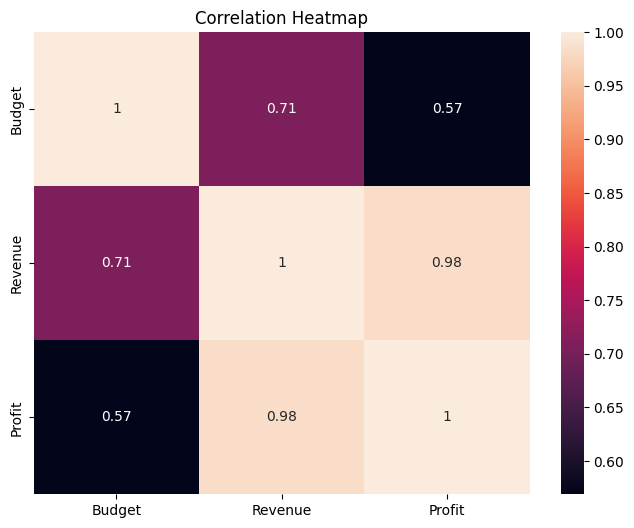

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Budget", "Revenue", "Profit"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

#### Explanation: Shows how strongly Budget, Revenue, and Profit are related.

### 5. Summing Up All Together

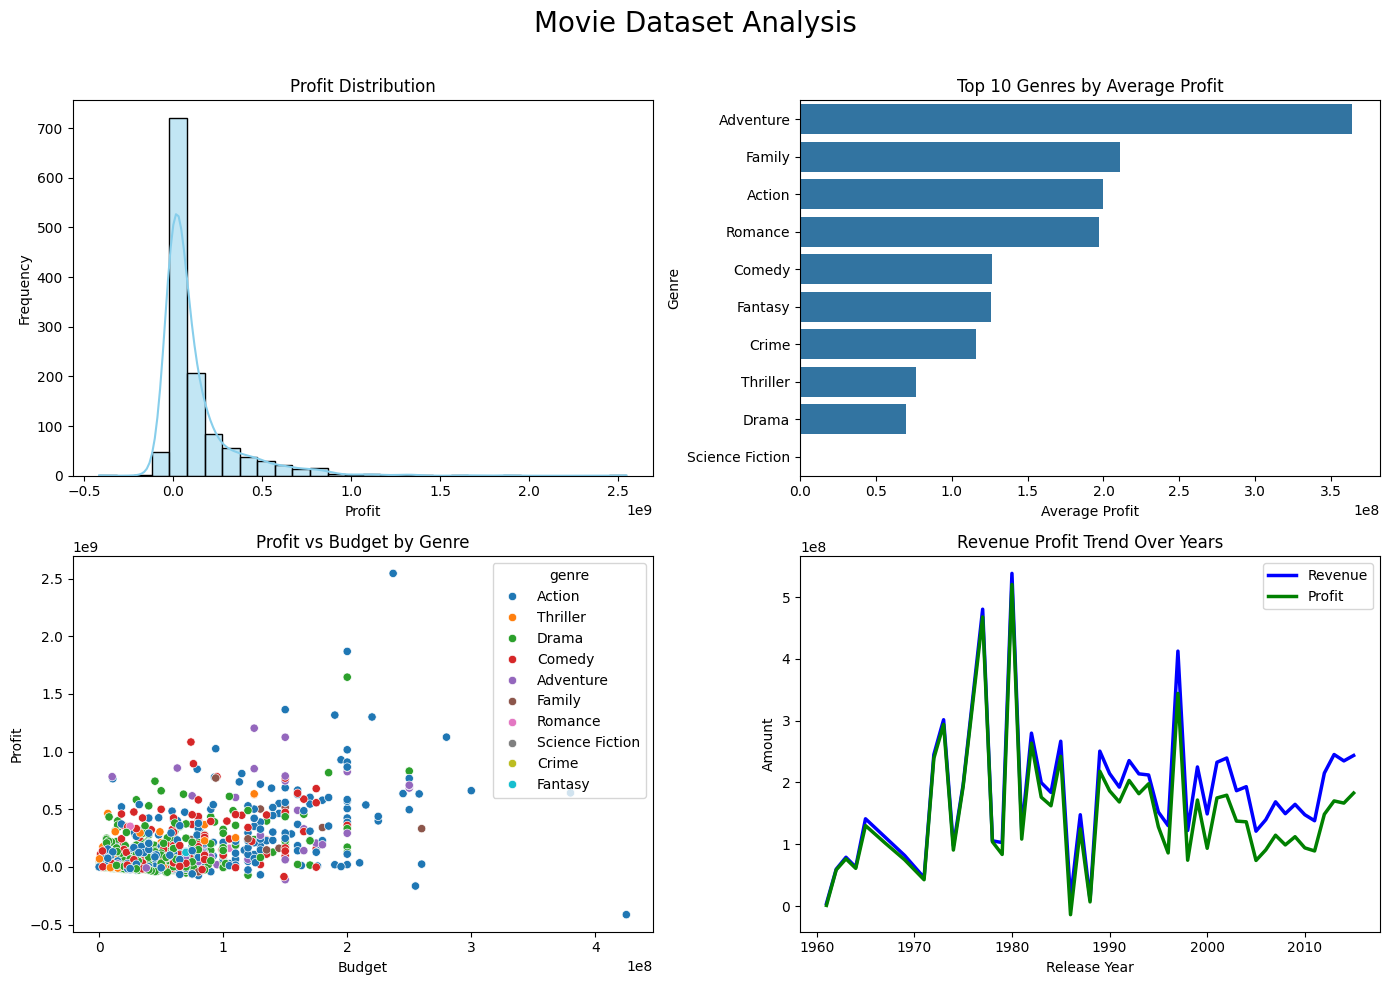

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Movie Dataset Analysis", fontsize=20)

###Distribution of Profit
sns.histplot(df["Profit"], bins=30, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title("Profit Distribution")
axes[0, 0].set_xlabel("Profit")
axes[0, 0].set_ylabel("Frequency")

###Average Profit by Genre
avg_profit = df.groupby("genre")["Profit"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_profit.values, y=avg_profit.index, ax=axes[0, 1])
axes[0, 1].set_title("Top 10 Genres by Average Profit")
axes[0, 1].set_xlabel("Average Profit")
axes[0, 1].set_ylabel("Genre")

###Profit vs Budget Scatter
sns.scatterplot(data=df, x="Budget", y="Profit", ax=axes[1, 0],hue="genre")
axes[1, 0].set_title("Profit vs Budget by Genre")
axes[1, 0].set_xlabel("Budget")
axes[1, 0].set_ylabel("Profit")

### Trend of Revenue and Profit Over Years
trend = df.groupby("Release Year")[["Revenue", "Profit"]].mean().reset_index()
sns.lineplot(data=trend, x="Release Year", y="Revenue", label="Revenue", ax=axes[1, 1], color="blue", linewidth=2.5)
sns.lineplot(data=trend, x="Release Year", y="Profit", label="Profit", ax=axes[1, 1], color="green", linewidth=2.5)
axes[1, 1].set_title("Revenue Profit Trend Over Years")
axes[1, 1].set_xlabel("Release Year")
axes[1, 1].set_ylabel("Amount")
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()